## Workflow stages

The workflow goes through five stages.

1. Question and problem definition.
2. Acquire training data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Visualize, report, and present the problem solving steps and final solution.


<h3>1. Question and problem definition:</h3>
For the ask step, first let's get some context from the cyclistic document:

Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes dierently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

Characters and teams
Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also oering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

Guiding questions
1. How do annual members and casual riders use Cyclistic bikes differently?

2. Why would casual riders buy Cyclistic annual memberships?

3. How can Cyclistic use digital media to influence casual riders to become members?

<h3>2.Acquire training data.  :</h3>
Extract from 2022-Apr to2023-Mar data.


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [132]:
filepaths = glob('*.csv')
filepath = filepaths[0]

<h3>3. Wrangle, prepare, cleanse the data.</h3>
Make new columns: weekday, Year-Month. 

Then change categorical colomns to numerical one: "member_cusual", "rideable_type"

Concat the table to eaxch 12 months tables to one table.

In [135]:
def extract(filepath):
    _df = pd.read_csv(filepath)
    df = _df.dropna()
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    df['Period'] = (df['ended_at']-df['started_at']).dt.total_seconds()
    df['Period'] = df['Period']/3600
    df['weekday'] = df['started_at'].dt.weekday
    df['Diff_lat'] = df['end_lat']-df['start_lat']
    df['Diff_lng'] = df['end_lng']-df['start_lng']
    df['member_casual'] = df['member_casual'].replace('member', 0)
    df['member_casual'] = df['member_casual'].replace('casual', 1)
    df['rideable_type'] = df['rideable_type'].replace('electric_bike', 0)
    df['rideable_type'] = df['rideable_type'].replace('classic_bike', 1)
    df['rideable_type'] = df['rideable_type'].replace('docked_bike', 2)
    df['Year-Month'] = df['started_at'].dt.strftime('%Y-%m')
    df['Year-Month'] = df['started_at'].dt.strftime('%Y-%m')
    df['Hour'] = df['started_at'].dt.hour
    df=df.iloc[0:,[1,12,13,14,17,18]]
    return df

In [136]:
df = extract(filepath)

In [137]:
df = pd.DataFrame()

for filepath in filepaths:
    _df = extract(filepath)
    df = pd.concat([df,_df])

In [138]:
df = df.sort_values('Year-Month')

In [ ]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

<h3>4. Analyze, identify patterns, and explore the data.

Only member type 2 using.

In [139]:
df[["rideable_type", "member_casual"]].groupby(['rideable_type'], as_index=False).mean().sort_values(by='member_casual', ascending=False)

,rideable_type,member_casual
2,2,1.000000
0,0,0.426291
1,1,0.336577


In [140]:
df[["weekday", "member_casual"]].groupby(['weekday'], as_index=False).mean().sort_values(by='member_casual', ascending=False)

,weekday,member_casual
5,5,0.514604
6,6,0.496068
4,4,0.401695
0,0,0.352518
3,3,0.350278
2,2,0.323293
1,1,0.319141


In [141]:
df[["member_casual", "Period"]].groupby(['member_casual'], as_index=False).mean().sort_values(by='Period', ascending=False)

,member_casual,Period
1,1,0.388858
0,0,0.204451


Numerical

In [142]:
df.columns

Index(['rideable_type', 'member_casual', 'Period', 'weekday', 'Year-Month',
       'Hour'],
      dtype='object')

<AxesSubplot:xlabel='member_casual', ylabel='count'>

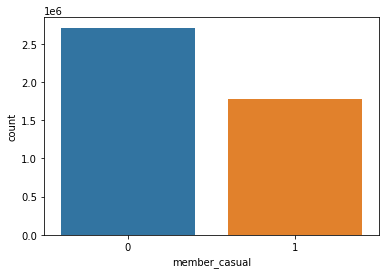

In [243]:
sns.countplot('member_casual',data=df)


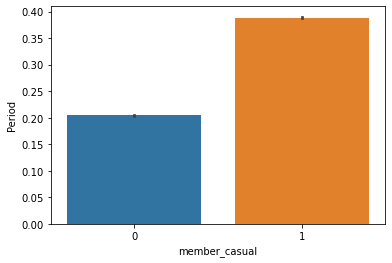

In [235]:
sns.barplot(x = "member_casual",y = "Period",data = df)
grid.fig.suptitle('How many hours/time used rental servious ')
grid.set_axis_labels('Member or casual ', 'Hours')
grid.add_legend()

Member:0,Casual:1

Member is majority one. But one time usage is less than casual.

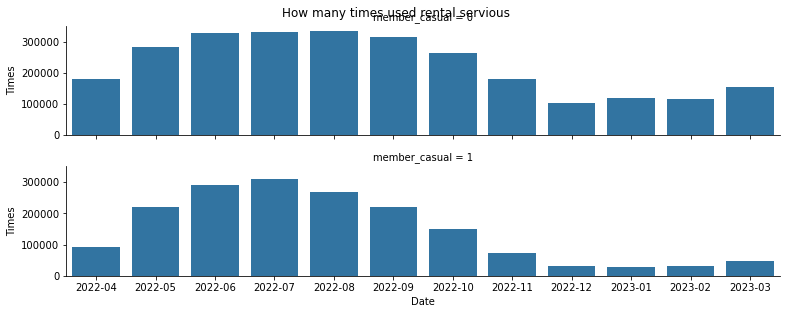

In [236]:
grid = sns.FacetGrid(df, row="member_casual", height=2.2, aspect=5)
grid.map(sns.countplot, 'Year-Month')
grid.fig.suptitle('How many times used rental servious')
grid.set_axis_labels('Date', 'Times')
grid.add_legend()

For bothside, they use more this service at summer season.

Maybe due to cold season.

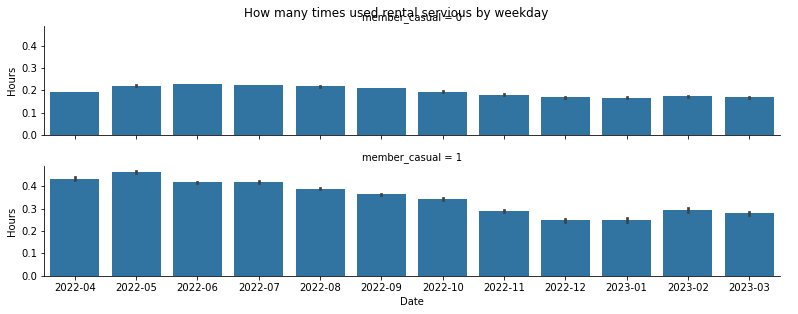

In [249]:
grid = sns.FacetGrid(df, row="member_casual", height=2.2, aspect=5)
grid.map(sns.barplot, 'Year-Month',"Period")
grid.fig.suptitle('How many times used rental servious by weekday')
grid.set_axis_labels('Date', 'Hours')
grid.add_legend()

Member is tend to use constance distance: maybe they are using for comution.

Casual is using more distance than member specially summer.

To see if the mwmbwer is using for compution??

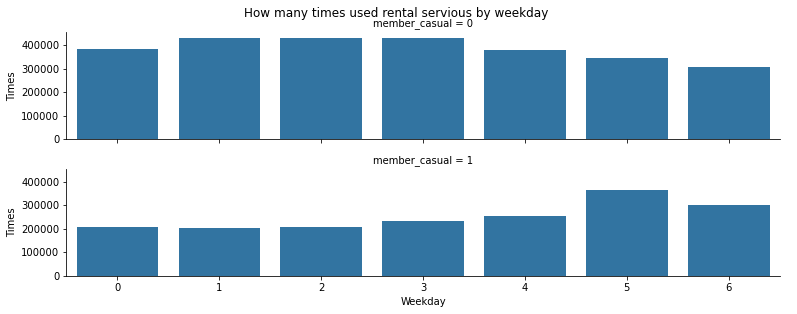

In [248]:
grid = sns.FacetGrid(df, row="member_casual", height=2.2, aspect=5)
grid.map(sns.countplot, 'weekday')
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('How many times used rental servious by weekday')
grid.set_axis_labels('Weekday', 'Times')
grid.add_legend()

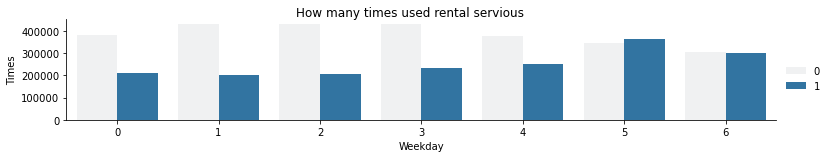

In [247]:
grid = sns.FacetGrid(df, height=2.2, aspect=5)
grid.map_dataframe(sns.countplot, 'weekday',hue = "member_casual")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('How many times used rental servious')
grid.set_axis_labels('Weekday', 'Times')
grid.add_legend()

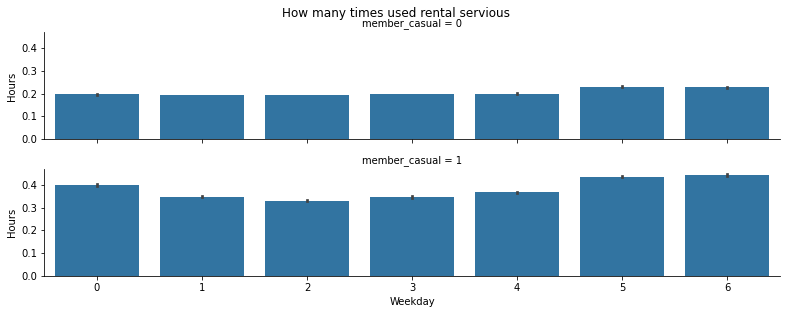

In [246]:
grid = sns.FacetGrid(df, row="member_casual", height=2.2, aspect=5)
grid.map(sns.barplot, 'weekday',"Period")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('How many times used rental servious')
grid.set_axis_labels('Weekday', 'Hours')
grid.add_legend()

Member is using more on Monday to friday.

Casual using more weekend.

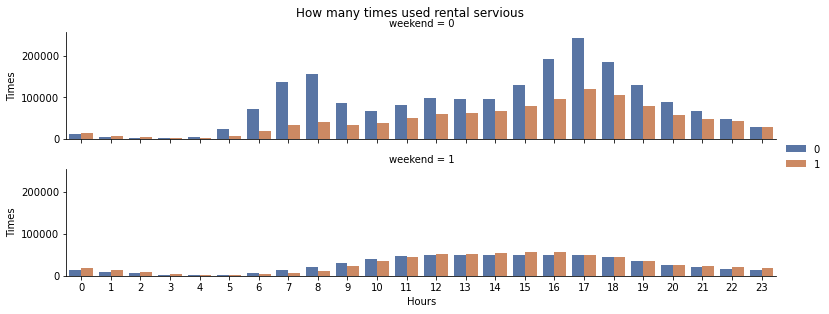

In [245]:
grid = sns.FacetGrid(data = df, row="weekend", height=2.2, aspect=5)
grid.map_dataframe(sns.countplot,'Hour', hue='member_casual', palette='deep')
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('How many times used rental servious')
grid.set_axis_labels('Hours', 'Times')
grid.add_legend()

0:weekday

1:weekend

6am to 8am and 4pm to 6pm for member: Compution

<h3>5. Visualize, report, and present the problem solving steps and final solution.


What I noticed from datasets.

1. Members have the bigger rate of the dataset, bigger than casuals.
2. The month with the biggest count of data points is July.
3. In all months, there are more member than casual.
4. Season heavily influences the volume of rides in the month.
5. There's a bigger volume of bikers in the afternoon.

Finding is the difference between members and casuals:

1. Casuals are using bigger time than members.
2. Member is using all weekday and constant distance.
3. Member is using more 6 to 8am and 4pm to 6pm and all seanon is same tendency.
4. Casual is using more on summer season and weekend at 12pm to 5pm: tend to use for leisure acticvities.

Conclusion:

How do annual members and casual riders use Cyclistic bikes differently?
1. Member is using for routine activities; comutuion or excersice.
2. Casual is using for leisure acticvities; not a fixed activities.
3. Both of them are using more on summer season.

Why would casual riders buy Cyclistic annual memberships?
1. The person who have routiine activities are tend to hsve annual membership.

How can Cyclistic use digital media to influence casual riders to become members?
1. Advertize for the befefit for comuption by cycleing; Green and eco or diet.
2. To accerarete usage of winter, free rental for winter equipment or give discount.